<a href="https://colab.research.google.com/github/keshavkarthik05/Machine-Learning/blob/main/LinearRegression/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/Taxi_Trips_-_2024_20240408.csv')

# Drop rows with missing or invalid fare values
df = df[df['Fare'] > 0]

# Filter out extreme outliers
df = df[(df['Trip Miles'] > 0) & (df['Trip Miles'] < 100)]

# Drop rows with missing GPS data
df = df.dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude',
                       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'])


In [4]:
from datetime import datetime

# Convert time columns to datetime
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')


# Extract useful time features
df['Hour'] = df['Trip Start Timestamp'].dt.hour
df['DayOfWeek'] = df['Trip Start Timestamp'].dt.dayofweek
df['Month'] = df['Trip Start Timestamp'].dt.month

# Encode payment type
df['IsCash'] = df['Payment Type'].apply(lambda x: 1 if 'Cash' in str(x) else 0)


In [5]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

    return R * c

df['Haversine_Distance'] = haversine(df['Pickup Centroid Latitude'], df['Pickup Centroid Longitude'],
                                     df['Dropoff Centroid Latitude'], df['Dropoff Centroid Longitude'])


In [6]:
from sklearn.model_selection import train_test_split

features = ['Trip Miles', 'Hour', 'DayOfWeek', 'Month', 'IsCash', 'Haversine_Distance']
target = 'Fare'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.744999386010105
R² Score: 0.9127746812431109


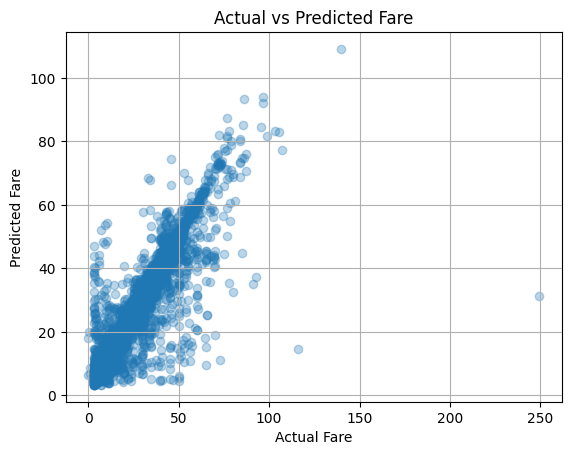

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.grid(True)
plt.show()
